In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load CSV file into a DataFrame
base_path = 'D:\人大\sf5'
case_name = 'worker03_20241112113836_sf5_tp16_ap16'
# bandwidth_df = pd.read_csv(f'{base_path}/{case_name}_mem_bandwidth_data.csv')
perf_df = pd.read_csv(f'{base_path}/{case_name}_perf_data.csv')
system_df = pd.read_csv(f'{base_path}/{case_name}_system_usage_data.csv')
img_save_folder = 'D:\人大\sf5'

In [7]:
perf_df

,l2d_cache,l2d_cache_refill,branch-loads,case_name,ts,l1d_cache,l2i_cache_refill,l1d_cache_refill,ll_cache_miss,l1i_cache,branch-misses,ll_cache,l2i_cache,l1i_cache_refill,dTLB-loads,dTLB-load-misses,relative_ts
0,614206012,253649226,9701981554,worker03_20241106134823_sf5_tp16_ap0,1730872103,20047991648,141137263,71293339,5108083,13499972965,557748495,117609100,350109530,399513068,20909290435,73199107,0
1,660987712,275801909,9596333401,worker03_20241106134823_sf5_tp16_ap0,1730872115,20017333095,154108114,68754063,5184192,13510337020,551185791,110066497,376798969,372573174,20682865142,75643065,12
2,652904747,271677352,9542115874,worker03_20241106134823_sf5_tp16_ap0,1730872127,20136307929,151582998,66691509,5267160,13591858613,554916691,117555884,371700764,358721458,20587584280,79603259,24
3,665603644,278464756,9640416498,worker03_20241106134823_sf5_tp16_ap0,1730872139,20901493315,156031579,66412508,5012899,14084401774,553077264,118238628,379850844,354598953,20777839769,78315577,36
4,664185812,275307277,10032814518,worker03_20241106134823_sf5_tp16_ap0,1730872151,19731883912,154656707,70040143,5315361,13348907666,567791857,119753961,381270473,381569609,21588901407,78133584,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,610388345,255811120,12032667594,worker03_20241106134823_sf5_tp16_ap0,1730873039,24700023346,142888863,64997873,5543046,16592913144,643158288,113155475,347672476,346869712,25904906538,73369471,936
79,601382848,251237973,11766668101,worker03_20241106134823_sf5_tp16_ap0,1730873051,24733302779,139349596,64874785,5412414,16610472714,631164333,110535970,340562509,344386720,25373729573,71220116,948
80,600393174,249915883,12205568207,worker03_20241106134823_sf5_tp16_ap0,1730873063,25998669896,138140823,63644793,5365737,17436237021,647943567,112887153,339271964,336709209,26304855081,72325278,960
81,617746184,260013190,12284129628,worker03_20241106134823_sf5_tp16_ap0,1730873075,26355645029,144653942,62681842,5539598,17663054429,649664805,114830463,349940213,327392555,26432664857,73492073,972


In [15]:
#149 kunpeng
# perf_df['fb_hit_rate'] = perf_df['mem_load_retired.fb_hit'] / perf_df['mem_inst_retired.all_loads']
perf_df['l1i_hit_rate'] = (perf_df['l1i_cache'] - perf_df['l1i_cache_refill']) / perf_df['l1i_cache']
perf_df['l1d_hit_rate'] = (perf_df['l1d_cache'] - perf_df['l1d_cache_refill']) / perf_df['l1d_cache']
perf_df['l2i_hit_rate'] = (perf_df['l2i_cache'] - perf_df['l2i_cache_refill']) / perf_df['l2i_cache']
perf_df['l2d_hit_rate'] = (perf_df['l2d_cache'] - perf_df['l2d_cache_refill']) / perf_df['l2d_cache']
perf_df['ll_hit_rate'] = (perf_df['ll_cache'] - perf_df['ll_cache_miss']) / perf_df['ll_cache']
perf_df['branch_prediction_accuracy'] = (perf_df['branch-loads'] - perf_df['branch-misses'])/ perf_df['branch-loads']

perf_df

,l1d_cache_refill,l1i_cache_refill,dTLB-load-misses,case_name,l1d_cache,l1i_cache,l2i_cache_refill,l2i_cache,relative_ts,ts,...,ll_cache_miss,l2d_cache,branch-misses,l2d_cache_refill,l1i_hit_rate,l1d_hit_rate,l2i_hit_rate,l2d_hit_rate,ll_hit_rate,branch_prediction_accuracy
0,86935346,255718314,435097980,worker03_20241112113836_sf5_tp16_ap16,71881435462,45806105114,58706808,270184672,0,1731382716,...,23461544,595054660,2112009344,193994579,0.994417,0.998791,0.782716,0.673989,0.784912,0.937148
1,92095786,296534447,169743617,worker03_20241112113836_sf5_tp16_ap16,73267254872,46228501936,84404541,293518819,12,1731382728,...,30611585,634092538,2047723041,229763321,0.993585,0.998743,0.712439,0.637650,0.755789,0.939431
2,87227792,247831988,149534314,worker03_20241112113836_sf5_tp16_ap16,75521244678,48431816392,77202259,265618304,24,1731382740,...,22550607,540522560,2038091928,198273389,0.994883,0.998845,0.709349,0.633182,0.773552,0.937504
3,79093781,200570357,119942964,worker03_20241112113836_sf5_tp16_ap16,71616353912,46092587068,85040772,206473665,36,1731382752,...,19067035,483079306,1919857725,214256547,0.995649,0.998896,0.588128,0.556477,0.834602,0.940682
4,74146486,235183994,418993433,worker03_20241112113836_sf5_tp16_ap16,72788404473,46783822650,82647996,234348584,48,1731382764,...,14391649,476605438,1942885593,194905055,0.994973,0.998981,0.647329,0.591056,0.848800,0.938369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,64071992,238107145,683706830,worker03_20241112113836_sf5_tp16_ap16,74641560187,48746820104,86219831,306574775,3540,1731386256,...,15653759,565003914,2107793875,198033708,0.995115,0.999142,0.718764,0.649500,0.832859,0.939787
296,61239296,264469640,573514204,worker03_20241112113836_sf5_tp16_ap16,74833538750,49321788788,72966555,268283614,3552,1731386268,...,14978284,483802513,1935990666,166368413,0.994638,0.999182,0.728025,0.656123,0.823275,0.944148
297,63157380,231515132,663380169,worker03_20241112113836_sf5_tp16_ap16,74364667011,48439047632,75784032,271028567,3564,1731386280,...,14214094,490616142,2097308663,174256564,0.995220,0.999151,0.720384,0.644821,0.839730,0.938446
298,66385026,251222957,671547826,worker03_20241112113836_sf5_tp16_ap16,73416433027,48352095981,83585080,266985435,3576,1731386292,...,18088512,482291574,2006624184,179105031,0.994804,0.999096,0.686930,0.628637,0.816024,0.943046


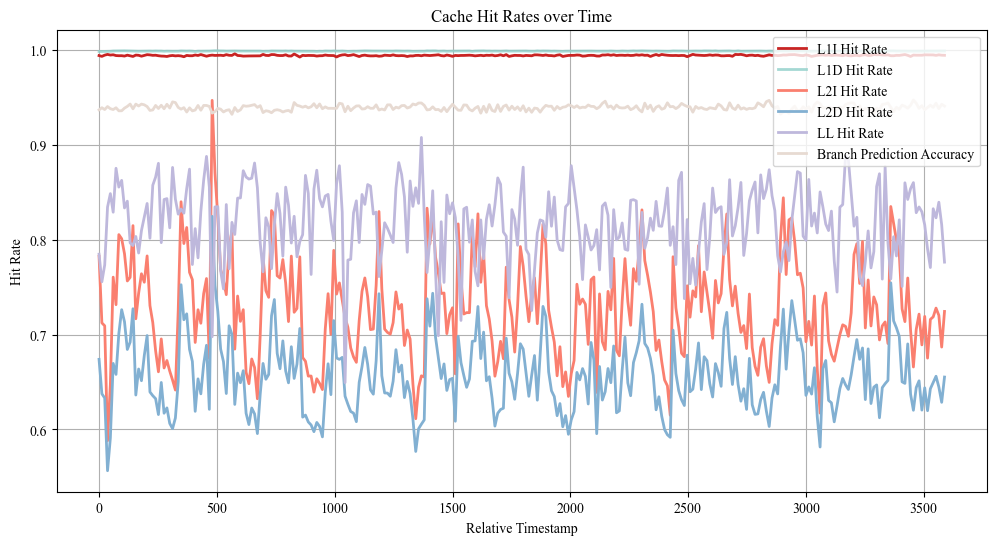

In [16]:
#149 kunpeng
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Times New Roman'
# plt.plot(perf_df['relative_ts'], perf_df['fb_hit_rate'], label='FB Hit Rate', linewidth=1)
plt.plot(perf_df['relative_ts'], perf_df['l1i_hit_rate'], label='L1I Hit Rate', color='#c82423', linewidth=2, alpha=1)
plt.plot(perf_df['relative_ts'], perf_df['l1d_hit_rate'], label='L1D Hit Rate', color='#8ecfc9', linewidth=2, alpha=0.8)
plt.plot(perf_df['relative_ts'], perf_df['l2i_hit_rate'], label='L2I Hit Rate', color='#fa7f6f', linewidth=2, alpha=1)
plt.plot(perf_df['relative_ts'], perf_df['l2d_hit_rate'], label='L2D Hit Rate', color='#82b0d2', linewidth=2, alpha=1)
plt.plot(perf_df['relative_ts'], perf_df['ll_hit_rate'], label='LL Hit Rate', color='#beb8dc', linewidth=2, alpha=1)
plt.plot(perf_df['relative_ts'], perf_df['branch_prediction_accuracy'], label='Branch Prediction Accuracy', color='#e7dad2', linewidth=2, alpha=1)

plt.xlabel('Relative Timestamp')
plt.ylabel('Hit Rate')
plt.title('Cache Hit Rates over Time')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig(f'{img_save_folder}/cache_hit_rates_plot.png', format='png')
plt.show()

In [11]:
system_df

,ts,mem_usage,cpu_usage,cpu_percent,mem_percent,relative_ts,case_name
0,1731378985,98182.8750,52.096,81.4,64.6,0,worker03_20241112103624_sf5_tp0_ap16
1,1731378986,98992.6875,44.032,68.8,65.0,1,worker03_20241112103624_sf5_tp0_ap16
2,1731378987,99629.4375,35.776,55.9,65.3,2,worker03_20241112103624_sf5_tp0_ap16
3,1731378988,100759.6250,35.136,54.9,65.9,3,worker03_20241112103624_sf5_tp0_ap16
4,1731378989,101846.5000,39.552,61.8,66.5,4,worker03_20241112103624_sf5_tp0_ap16
...,...,...,...,...,...,...,...
3595,1731382580,157177.3125,44.416,69.4,91.9,3595,worker03_20241112103624_sf5_tp0_ap16
3596,1731382581,151971.2500,43.328,67.7,89.2,3596,worker03_20241112103624_sf5_tp0_ap16
3597,1731382582,152216.8125,40.896,63.9,89.4,3597,worker03_20241112103624_sf5_tp0_ap16
3598,1731382583,152437.6875,39.360,61.5,89.5,3598,worker03_20241112103624_sf5_tp0_ap16


In [17]:
system_df['mem_usage(GB)'] = system_df['mem_usage'] / 1024
system_df

,cpu_usage,case_name,mem_percent,mem_usage,relative_ts,ts,cpu_percent,mem_usage(GB)
0,57.984,worker03_20241112113836_sf5_tp16_ap16,80.1,133169.8750,1,1731382717,90.6,130.048706
1,59.392,worker03_20241112113836_sf5_tp16_ap16,77.8,128819.2500,1,1731382718,92.8,125.800049
2,62.016,worker03_20241112113836_sf5_tp16_ap16,77.3,127688.9375,2,1731382719,96.9,124.696228
3,61.696,worker03_20241112113836_sf5_tp16_ap16,76.6,126481.6875,3,1731382720,96.4,123.517273
4,60.288,worker03_20241112113836_sf5_tp16_ap16,76.8,126847.8750,4,1731382721,94.2,123.874878
...,...,...,...,...,...,...,...,...
3595,61.504,worker03_20241112113836_sf5_tp16_ap16,76.9,126800.6875,3595,1731386312,96.1,123.828796
3596,61.632,worker03_20241112113836_sf5_tp16_ap16,77.0,127024.8125,3596,1731386313,96.3,124.047668
3597,58.496,worker03_20241112113836_sf5_tp16_ap16,76.8,126700.8125,3597,1731386314,91.4,123.731262
3598,51.328,worker03_20241112113836_sf5_tp16_ap16,76.6,126226.9375,3598,1731386315,80.2,123.268494


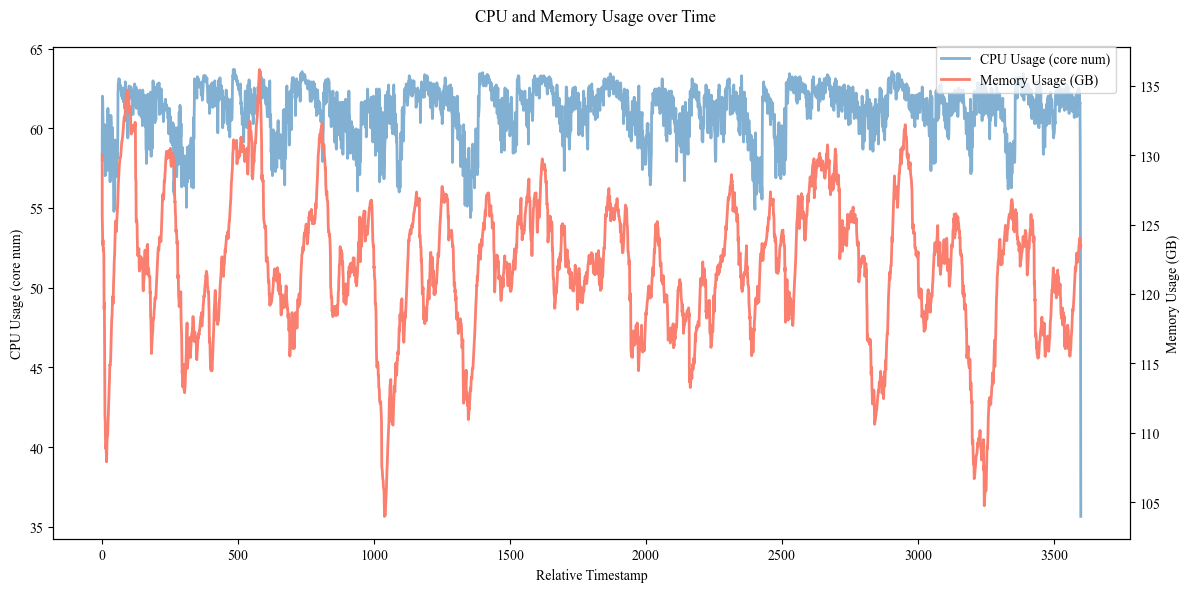

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.rcParams['font.family'] = 'Times New Roman'
ax1.plot(system_df['relative_ts'], system_df['cpu_usage'], label='CPU Usage (core num)', color='#82b0d2', linewidth=2)
ax1.set_xlabel('Relative Timestamp')
ax1.set_ylabel('CPU Usage (core num)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(system_df['relative_ts'], system_df['mem_usage(GB)'], label='Memory Usage (GB)', color='#fa7f6f', linewidth=2)
ax2.set_ylabel('Memory Usage (GB)')
ax2.tick_params(axis='y')

fig.suptitle('CPU and Memory Usage over Time')
fig.tight_layout()

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(0.94, 0.93), ncol=1)

fig.savefig(f'{img_save_folder}/cpu_mem_usage_plot.png', format='png')
plt.show()